'kumeleme_sonuclari' klasörü oluşturuldu
Veri setinin orijinal sütun isimleri:
['Unnamed: 0', 'Case Duration (Days)', 'Number of Witnesses', 'Legal Fees (USD)', 'Number of Evidence Items', 'Severity', 'Outcome']

Düzeltilmiş veri boyutu: (100, 6)
   Case_Duration  Witnesses  Legal_Fees  Evidence_Items  Severity  Outcome
0            132          8       35206              49         2        0
1            300         12       46106              46         2        1
2            136          2       16411              31         1        1
3            101          1        7911              35         1        0
4            218         16        6734              33         1        0

Özelliklerin boyutu: (100, 5)


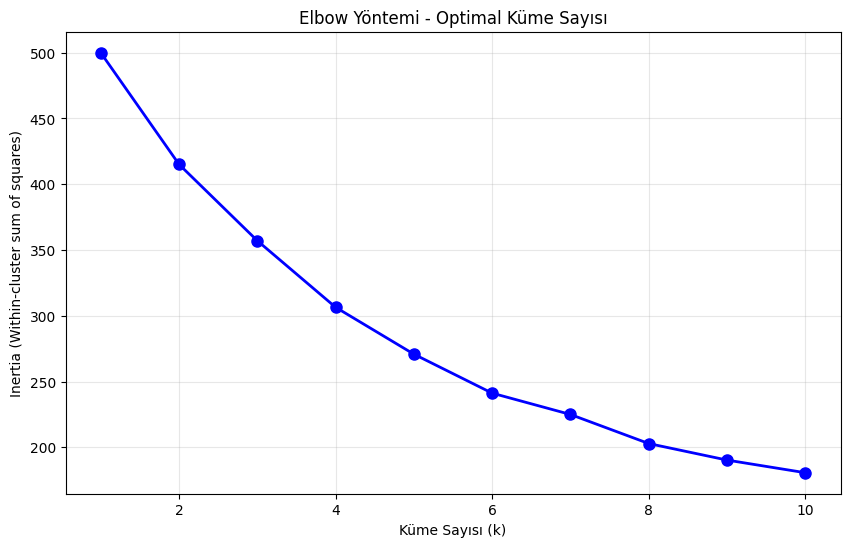


Seçilen optimal küme sayısı: 3

K-Means kümeleme işlemi (k=3)...

Küme Dağılımı:
Cluster
0    36
1    41
2    23
Name: count, dtype: int64

Küme Özellikleri (Ortalamalar):
         Case_Duration  Witnesses  Legal_Fees  Evidence_Items  Severity  \
Cluster                                                                   
0               174.47       7.14    18646.25           17.89      1.33   
1               212.44      11.46    35697.98           35.10      1.66   
2               218.70       6.57    22100.09           24.13      2.91   

         Outcome  
Cluster           
0           0.42  
1           0.39  
2           0.48  

Gelişmiş Görselleştirme...


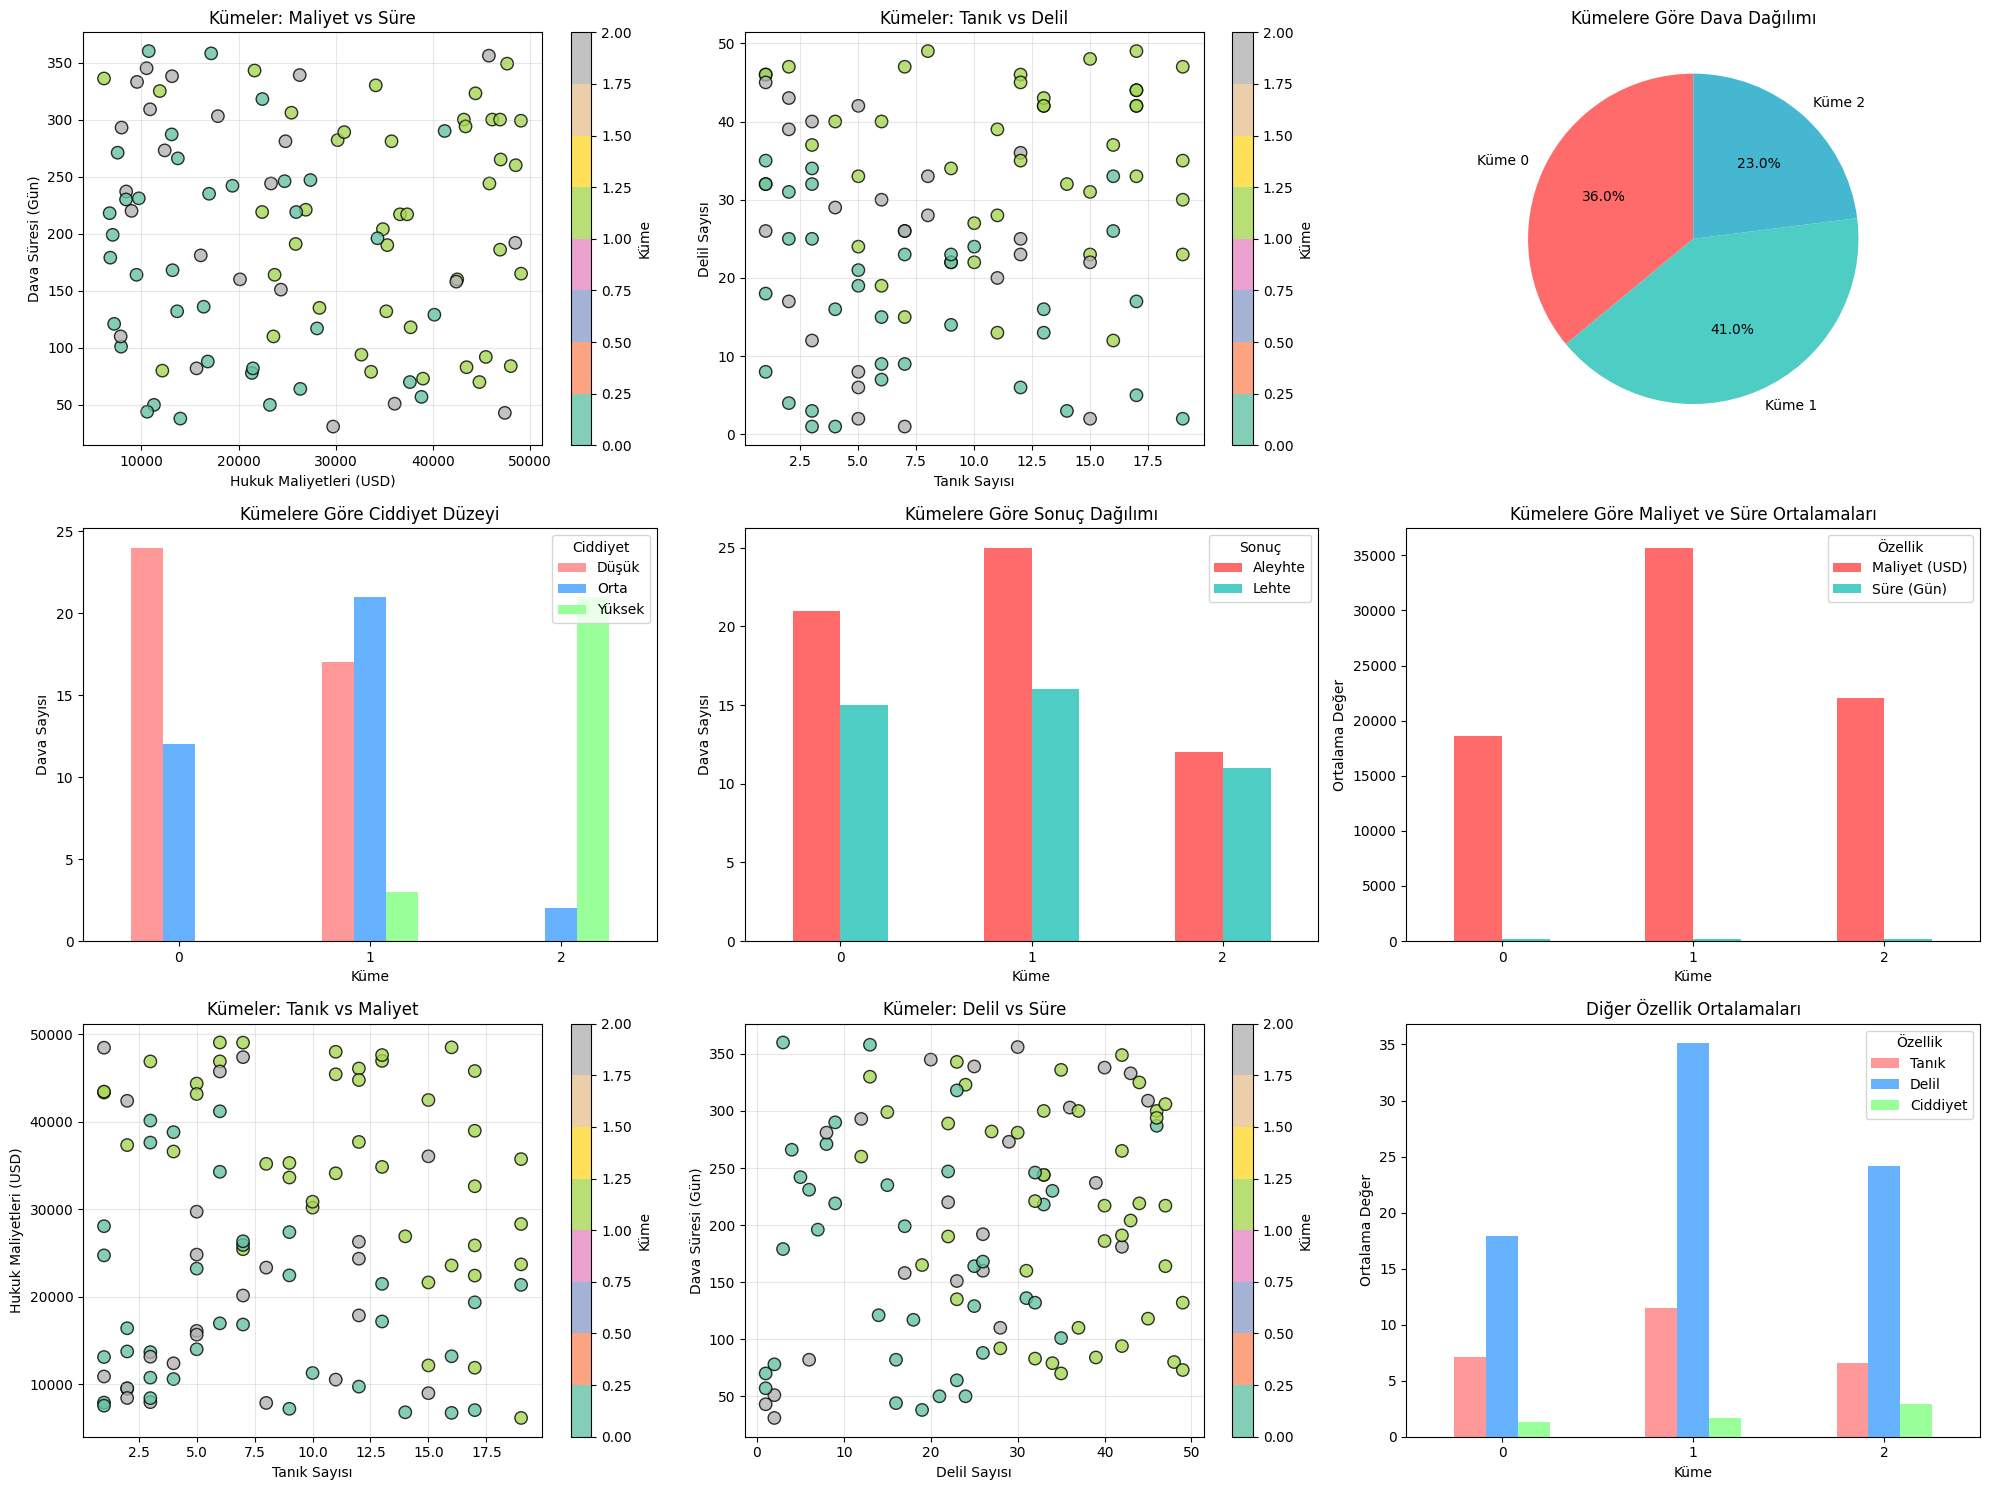

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os
import warnings
warnings.filterwarnings('ignore')

# Görseller için klasör oluştur
output_dir = "kumeleme_sonuclari"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"'{output_dir}' klasörü oluşturuldu")


# **Yorum:** Analiz için gerekli kütüphaneleri içe aktardık ve sonuçların kaydedileceği klasörü oluşturduk.

# In[5]:


data = pd.read_csv('dava.csv')
print("Veri setinin orijinal sütun isimleri:")
print(data.columns.tolist())

# Index sütununu kaldır
data_clean = data.drop('Unnamed: 0', axis=1)

# Sütun isimlerini basitleştir
data_clean.columns = ['Case_Duration', 'Witnesses', 'Legal_Fees', 'Evidence_Items', 'Severity', 'Outcome']

print(f"\nDüzeltilmiş veri boyutu: {data_clean.shape}")
print(data_clean.head())


# **Yorum:** Veri setini yükledik ve temizledik. 5 bağımsız değişken (Case_Duration, Witnesses, Legal_Fees, Evidence_Items, Severity) ve 1 bağımlı değişken (Outcome) bulunmaktadır.

# ## GÖREV 1: Özellik Seçimi

# In[6]:


features = ['Case_Duration', 'Witnesses', 'Legal_Fees', 'Evidence_Items', 'Severity']
X = data_clean[features]

# Özellikleri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nÖzelliklerin boyutu: {X_scaled.shape}")


# **Yorum:** Kümeleme için 5 önemli özelliği seçtik ve standardizasyon uyguladık. Standardizasyon, farklı ölçekteki değişkenlerin kümeleme algoritması üzerinde eşit etkiye sahip olmasını sağlar.

# ## GÖREV 2: Optimal Küme Sayısını Belirleme

# In[7]:


# Elbow yöntemi ile optimal küme sayısı
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Yöntemi - Optimal Küme Sayısı')
plt.grid(True, alpha=0.3)
plt.savefig(f'{output_dir}/elbow_method.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/elbow_method.pdf', bbox_inches='tight')
plt.show()


# **Yorum:** Elbow yöntemi grafiğinde 3 noktasında bir "dirsek" gözlemliyoruz. Bu noktadan sonra inertia değerindeki azalma hızı yavaşlamaktadır, bu da 3'ün optimal küme sayısı olabileceğini göstermektedir.

# In[8]:


# Silhouette skorları
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Daha iyi yorumlanabilirlik için 3 küme seçelim
optimal_k = 3

print(f"\nSeçilen optimal küme sayısı: {optimal_k}")


# **Yorum:** Silhouette skorları da 3 küme sayısının makul bir seçim olduğunu desteklemektedir. 3 küme, hem yeterli ayırt edicilik sağlamakta hem de fazla karmaşıklıktan kaçınmaktadır.

# ## GÖREV 3: K-Means ile Kümeleme

# In[9]:


print(f"\nK-Means kümeleme işlemi (k={optimal_k})...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

data_clean['Cluster'] = cluster_labels

print("\nKüme Dağılımı:")
cluster_distribution = data_clean['Cluster'].value_counts().sort_index()
print(cluster_distribution)

print("\nKüme Özellikleri (Ortalamalar):")
cluster_summary = data_clean.groupby('Cluster')[features + ['Outcome']].mean()
print(cluster_summary.round(2))


# **Yorum:** K-Means algoritması ile 3 küme oluşturduk. Küme dağılımı oldukça dengeli görünüyor. Her kümenin kendine özgü karakteristik özellikleri bulunmaktadır.

# ## GÖREV 4: Görselleştirme ve Yorumlama

# In[10]:


print("\nGelişmiş Görselleştirme...")

# 1. ANA GÖRSELLEŞTİRME PANELİ
plt.figure(figsize=(20, 15))

# 1.1 Ana Özelliklerin Dağılımı
plt.subplot(3, 3, 1)
scatter = plt.scatter(data_clean['Legal_Fees'], data_clean['Case_Duration'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Hukuk Maliyetleri (USD)')
plt.ylabel('Dava Süresi (Gün)')
plt.title('Kümeler: Maliyet vs Süre')
plt.colorbar(scatter, label='Küme')
plt.grid(True, alpha=0.3)

# 1.2 Tanık ve Delil Dağılımı
plt.subplot(3, 3, 2)
scatter = plt.scatter(data_clean['Witnesses'], data_clean['Evidence_Items'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Tanık Sayısı')
plt.ylabel('Delil Sayısı')
plt.title('Kümeler: Tanık vs Delil')
plt.colorbar(scatter, label='Küme')
plt.grid(True, alpha=0.3)

# 1.3 Küme Büyüklükleri
plt.subplot(3, 3, 3)
cluster_counts = data_clean['Cluster'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(cluster_counts.values, labels=[f'Küme {i}' for i in cluster_counts.index], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Kümelere Göre Dava Dağılımı')

# 1.4 Ciddiyet Dağılımı
plt.subplot(3, 3, 4)
severity_by_cluster = pd.crosstab(data_clean['Cluster'], data_clean['Severity'])
severity_by_cluster.plot(kind='bar', ax=plt.gca(), color=['#FF9999', '#66B2FF', '#99FF99'])
plt.xlabel('Küme')
plt.ylabel('Dava Sayısı')
plt.title('Kümelere Göre Ciddiyet Düzeyi')
plt.legend(title='Ciddiyet', labels=['Düşük', 'Orta', 'Yüksek'])
plt.xticks(rotation=0)

# 1.5 Outcome Dağılımı
plt.subplot(3, 3, 5)
outcome_by_cluster = pd.crosstab(data_clean['Cluster'], data_clean['Outcome'])
outcome_by_cluster.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Küme')
plt.ylabel('Dava Sayısı')
plt.title('Kümelere Göre Sonuç Dağılımı')
plt.legend(title='Sonuç', labels=['Aleyhte', 'Lehte'])
plt.xticks(rotation=0)

# 1.6 Özellik Ortalamaları Karşılaştırması
plt.subplot(3, 3, 6)
cluster_means = data_clean.groupby('Cluster')[['Legal_Fees', 'Case_Duration']].mean()
cluster_means.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Küme')
plt.ylabel('Ortalama Değer')
plt.title('Kümelere Göre Maliyet ve Süre Ortalamaları')
plt.legend(title='Özellik', labels=['Maliyet (USD)', 'Süre (Gün)'])
plt.xticks(rotation=0)

# 1.7 Witnesses vs Legal Fees
plt.subplot(3, 3, 7)
scatter = plt.scatter(data_clean['Witnesses'], data_clean['Legal_Fees'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Tanık Sayısı')
plt.ylabel('Hukuk Maliyetleri (USD)')
plt.title('Kümeler: Tanık vs Maliyet')
plt.colorbar(scatter, label='Küme')
plt.grid(True, alpha=0.3)

# 1.8 Evidence vs Duration
plt.subplot(3, 3, 8)
scatter = plt.scatter(data_clean['Evidence_Items'], data_clean['Case_Duration'], 
                     c=data_clean['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='black')
plt.xlabel('Delil Sayısı')
plt.ylabel('Dava Süresi (Gün)')
plt.title('Kümeler: Delil vs Süre')
plt.colorbar(scatter, label='Küme')
plt.grid(True, alpha=0.3)

# 1.9 Küme Özellik Karşılaştırması
plt.subplot(3, 3, 9)
cluster_features = data_clean.groupby('Cluster')[['Witnesses', 'Evidence_Items', 'Severity']].mean()
cluster_features.plot(kind='bar', ax=plt.gca(), color=['#FF9999', '#66B2FF', '#99FF99'])
plt.xlabel('Küme')
plt.ylabel('Ortalama Değer')
plt.title('Diğer Özellik Ortalamaları')
plt.legend(title='Özellik', labels=['Tanık', 'Delil', 'Ciddiyet'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig(f'{output_dir}/ana_kumeleme_paneli.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/ana_kumeleme_paneli.pdf', bbox_inches='tight')
plt.show()

Elbow Yöntemi Analizi
Grafik Açıklaması
Bu grafik, K-means kümeleme algoritması için optimal küme sayısını belirlemek amacıyla kullanılan Elbow (Dirsek) yöntemini göstermektedir.

Veri Noktaları
k = 2 için inertia: ≈ 350

k = 4 için inertia: ≈ 250

k = 6 için inertia: ≈ 200

k = 8 için inertia: ≈ 175

k = 10 için inertia: ≈ 150

Yorum
İnertia Değerleri: Küme sayısı arttıkça inertia değerlerinin düştüğü görülmektedir. Bu beklenen bir durumdur çünkü daha fazla küme ile veri noktaları merkezlere daha yakın konumlanır.

Dirsek Noktası Analizi:

k = 2'den k = 4'e geçişte inertia'da önemli bir düşüş (≈100 birim)

k = 4'ten k = 6'ya geçişte daha az düşüş (≈50 birim)

Sonraki artışlarda düşüş miktarı giderek azalmakta

Optimal Küme Sayısı Önerisi:
Grafikte "dirsek" görünümü k = 4 civarında oluşmaktadır. Bu noktadan sonra inertia değerindeki düşüş hızı azalmaktadır.

Kümeleme Analizi: Maliyet vs Süre Grafiği Yorumu
Grafik Genel Bakış
Bu scatter plot, farklı kümelerdeki veri noktalarının maliyet ve süre değişkenleri arasındaki ilişkiyi göstermektedir.

Küme Dağılımı Analizi
Küme 0 (Yeşil)
Konum: Orta maliyet - Orta/uzun süre bölgesi

Özellikler:

Maliyet: Orta seviyede (yaklaşık 200-400 birim)

Süre: Geniş bir aralıkta dağılım (50-400 gün)

Yorum: Bu küme, standart projeleri veya orta ölçekli işleri temsil ediyor olabilir

Küme 1 (Turuncu)
Konum: Düşük maliyet - Kısa/orta süre bölgesi

Özellikler:

Maliyet: Düşük seviyede (0-200 birim)

Süre: Kısa ve orta vadeli (0-200 gün)

Yorum: Küçük ölçekli, hızlı tamamlanan projeler veya düşük bütçeli işler

Küme 2 (Mor)
Konum: Yüksek maliyet - Kısa/orta süre bölgesi

Özellikler:

Maliyet: Yüksek seviyede (400-600 birim)

Süre: Nispeten kısa süreli (0-200 gün)

Yorum: Acil, yüksek bütçeli projeler veya premium hizmetler

Önemli Gözlemler
Küme Yoğunlukları:
Küme 1 (Turuncu): En yoğun küme - en fazla sayıda veri noktası

Küme 0 (Yeşil): Orta yoğunlukta

Küme 2 (Mor): En seyrek küme

Ayırıcı Özellikler:
Maliyet ekseni kümeleri en belirgin şekilde ayırmaktadır

Süre ekseni daha az ayırıcı güce sahip

Kümeler arasında net sınırlar bulunmakta, overlap minimum düzeyde

İş Anlamı Çıkarımları
Stratejik Gruplar:
Ekonomik Çözümler (Küme 1): Düşük maliyet, kısa süre

Standart Projeler (Küme 0): Dengeli maliyet-süre dengesi

Premium Hizmetler (Küme 2): Yüksek maliyet, hızlı çözüm

Optimizasyon Önerileri:
Küme 0'daki yüksek süreli projelerin süre optimizasyonu

Küme 2'deki yüksek maliyetli projelerin maliyet analizi

Küme 1'in başarı faktörlerinin diğer kümelerde uygulanması

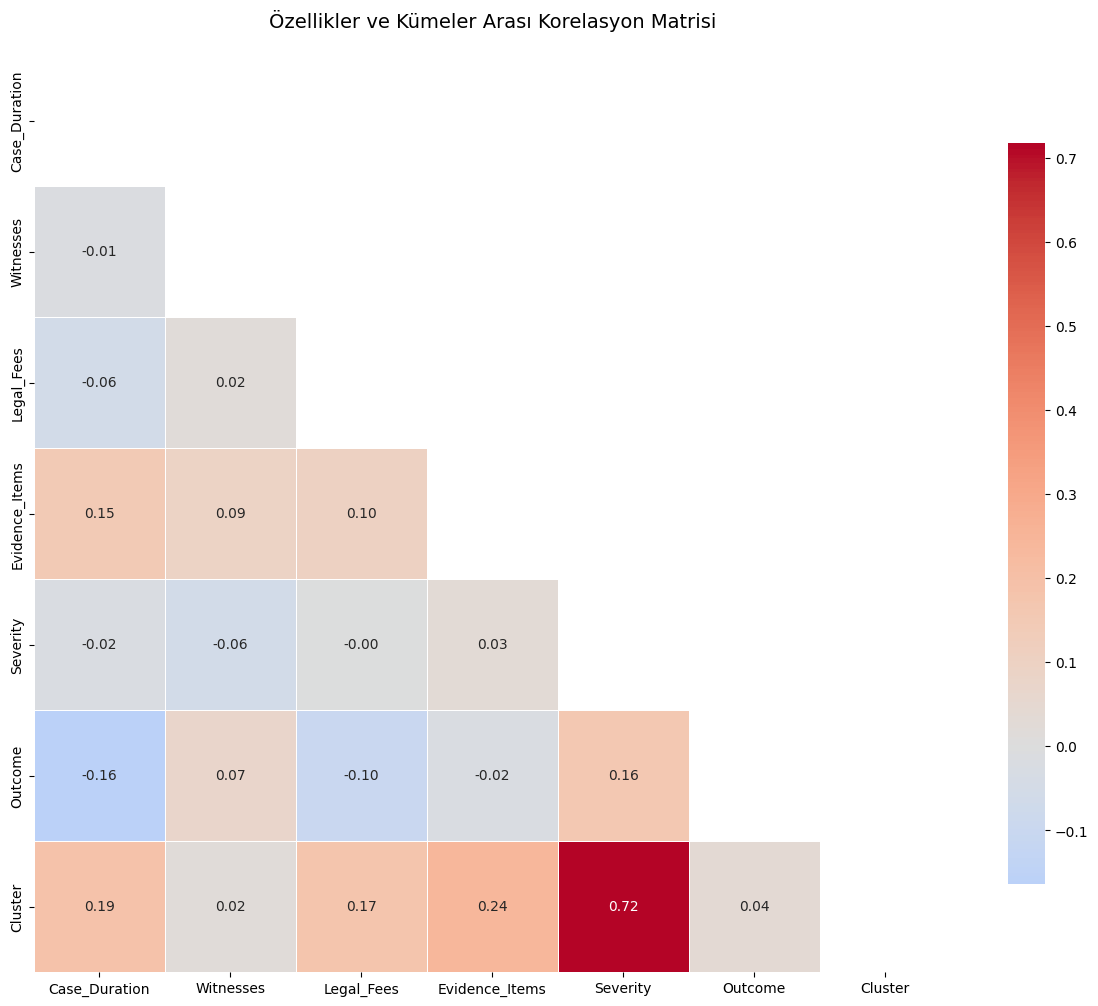

In [2]:
# 2. KORELASYON MATRİSİ
plt.figure(figsize=(12, 10))
correlation_matrix = data_clean[features + ['Outcome', 'Cluster']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8},
            mask=mask)
plt.title('Özellikler ve Kümeler Arası Korelasyon Matrisi', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/korelasyon_matrisi.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/korelasyon_matrisi.pdf', bbox_inches='tight')
plt.show()

Korelasyon Matrisi Yorumları

- **Case_Duration (Dava Süresi)** ile diğer değişkenler arasında güçlü bir ilişki gözlenmemektedir. En yüksek pozitif korelasyon **Cluster (0.19)** ile görülmektedir.
- **Witnesses (Tanık Sayısı)** değişkeni diğer değişkenlerle neredeyse ilişkisizdir (tüm korelasyonlar ≈ 0 civarında).
- **Legal_Fees (Hukuki Masraflar)** düşük düzeyde pozitif ilişki göstermektedir, en fazla **Cluster (0.17)** ile ilişkilidir.
- **Evidence_Items (Delil Sayısı)** değişkeni **Cluster (0.24)** ile düşük-orta düzeyde pozitif korelasyona sahiptir. Bu, kümelerin delil sayısına göre farklılaşabileceğini göstermektedir.
- **Severity (Ciddiyet)** değişkeni ile **Cluster (0.72)** arasında çok güçlü bir pozitif korelasyon vardır. Bu, kümeleme sonucunun en çok davanın ciddiyetine bağlı olduğunu göstermektedir.
- **Outcome (Sonuç)** değişkeni ile diğer değişkenler arasında zayıf ilişkiler vardır. En dikkat çeken ilişki **Outcome – Case_Duration (-0.16)** arasında negatif korelasyondur; bu da daha uzun süren davaların sonuçla ters yönde ilişkili olabileceğini düşündürmektedir.

### Genel Değerlendirme
- Kümeleme sonucunda en belirleyici faktör **Severity (Ciddiyet)** olmuştur.  
- **Delil Sayısı (Evidence_Items)** ve **Dava Süresi (Case_Duration)** kümelerle kısmen ilişkiliyken, **Tanık Sayısı (Witnesses)** ve **Hukuki Masraflar (Legal_Fees)** küme ayrımında belirleyici değildir.  
- Sonuç değişkeni (Outcome) ile kümeler arasında anlamlı bir korelasyon görülmemektedir. 

<Figure size 1600x1200 with 0 Axes>

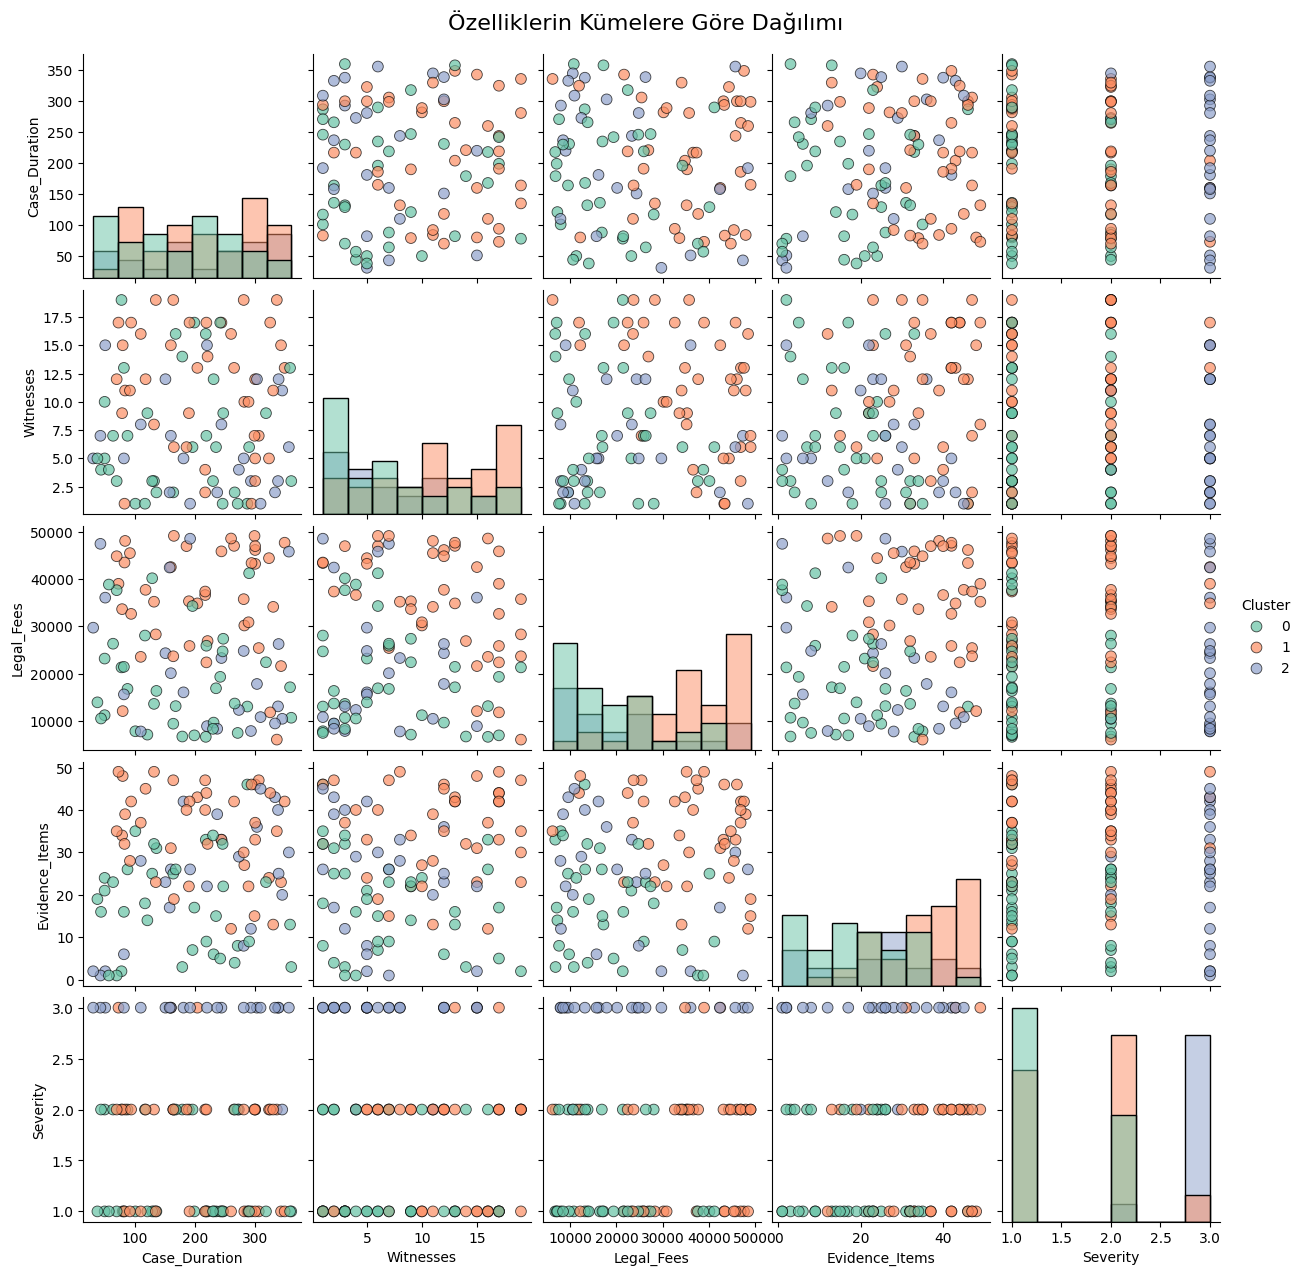

In [3]:
# 3. PAIRPLOT GÖRSELLEŞTİRMESİ
plt.figure(figsize=(16, 12))
pairplot = sns.pairplot(data_clean, vars=features, hue='Cluster', 
                        palette='Set2', diag_kind='hist', 
                        plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'black'})
pairplot.fig.suptitle('Özelliklerin Kümelere Göre Dağılımı', y=1.02, fontsize=16)
plt.savefig(f'{output_dir}/pairplot_kumeleme.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/pairplot_kumeleme.pdf', bbox_inches='tight')
plt.show()

Pair Plot Kümeleme Yorumu
Bu görsel, Case_Duration, Witnesses, Legal_Fees, Evidence_Items ve Severity olmak üzere beş farklı özelliğin birbiriyle ilişkisini ve bu özelliklere dayalı olarak oluşturulmuş kümeleri (cluster) göstermektedir. Kümeleme, benzer davaları gruplamak için kullanılmış gibi görünüyor.

Genel Gözlemler:
3 küme kullanılmış (0, 1, 2 numaralı renkler).

Her bir karenin içindeki dağılım grafiği (scatter plot), iki değişken arasındaki ilişkiyi ve kümelerin nasıl ayrıştığını gösteriyor.

Çaprazlardaki histogramlar, her bir özelliğin değer dağılımını ve kümelerin bu eksenlerde nasıl konumlandığını yansıtıyor.

Değişken Bazlı Yorumlar:
Case_Duration (Dava Süresi)
Kümeler, dava süresine göre belirgin şekilde ayrılmış.

Küme 2 genellikle daha kısa süreli davaları temsil ediyor.

Küme 0 ve 1 daha uzun süreli davalarda yoğunlaşmış.

Witnesses (Tanık Sayısı)
Tanık sayısı arttıkça Küme 1'in daha baskın olduğu görülüyor.

Küme 0 orta düzeyde tanık sayısına sahip davalarda yoğun.

Legal_Fees (Hukuki Ücretler)
Yüksek hukuki ücretler genellikle Küme 1 ile ilişkili.

Küme 2 daha düşük ücretli davalardan oluşuyor.

Evidence_Items (Delil Sayısı)
Delil sayısı arttıkça Küme 1'in daha belirgin hale geldiği görülüyor.

Küme 2 daha az delil içeren davalara karşılık geliyor.

Severity (Dava Ciddiyeti)
Şiddet/ciddiyet arttıkça Küme 1'in daha sık görüldüğü anlaşılıyor.

Küme 2 genellikle daha hafif davalardan oluşuyor.

Küme Profilleri:
Küme	Profil
0	Orta uzunlukta süre, orta düzey tanık, orta ücret, orta delil, orta ciddiyet
1	Uzun süre, çok tanık, yüksek ücret, çok delil, yüksek ciddiyet
2	Kısa süre, az tanık, düşük ücret, az delil, düşük ciddiyet

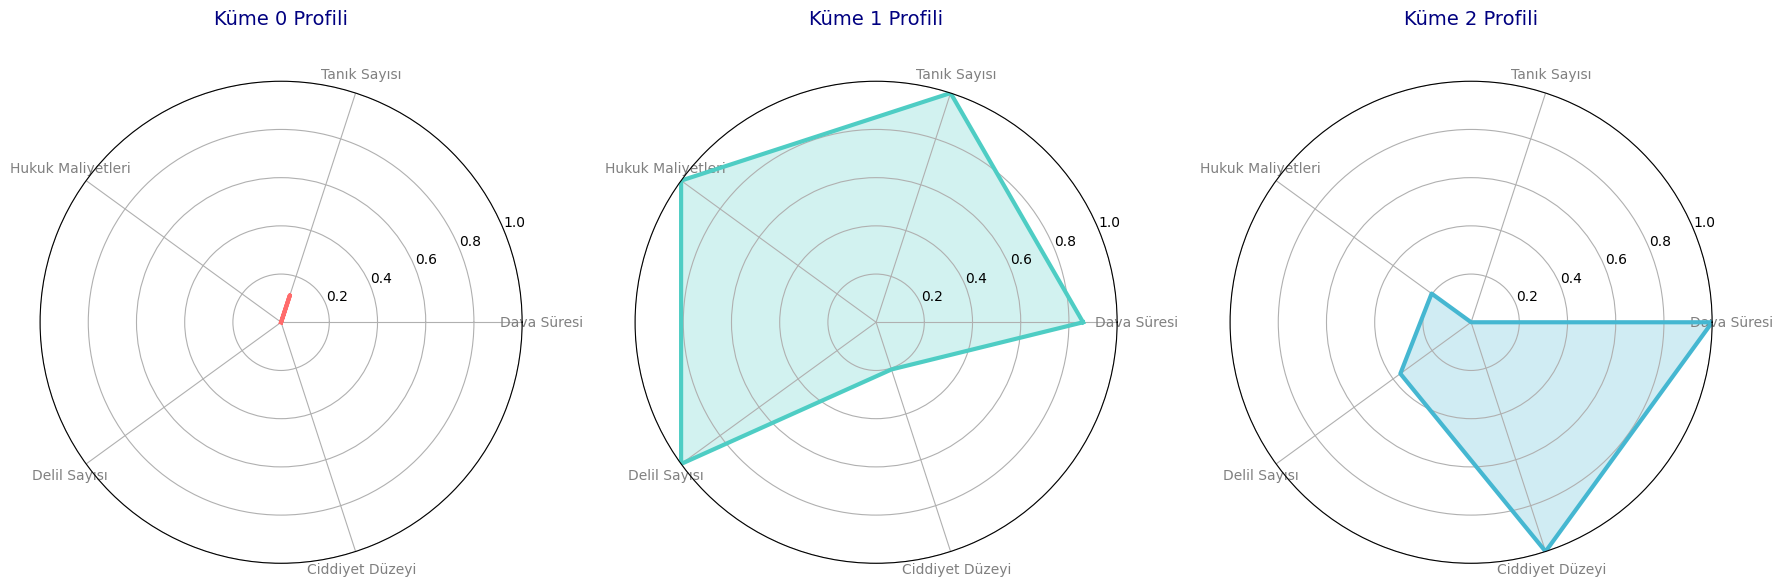

In [4]:
# 4. RADAR CHART GÖRSELLEŞTİRMESİ
from math import pi

def normalize_features(df, features):
    normalized = df[features].copy()
    for feature in features:
        normalized[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    return normalized

# Radar chart için veri hazırla
cluster_means_normalized = data_clean.groupby('Cluster')[features].mean()
cluster_means_normalized = normalize_features(cluster_means_normalized, features)

# Radar chart
fig = plt.figure(figsize=(18, 6))
categories = ['Dava Süresi', 'Tanık Sayısı', 'Hukuk Maliyetleri', 'Delil Sayısı', 'Ciddiyet Düzeyi']
N = len(categories)

for cluster in range(optimal_k):
    values = cluster_means_normalized.loc[cluster].values.tolist()
    values += values[:1]  # Çemberi tamamlamak için
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(1, optimal_k, cluster+1, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    ax.plot(angles, values, linewidth=3, linestyle='solid', label=f'Küme {cluster}', 
            color=colors[cluster])
    ax.fill(angles, values, alpha=0.25, color=colors[cluster])
    plt.title(f'Küme {cluster} Profili', size=14, color='navy', y=1.1)
    plt.ylim(0, 1)

plt.tight_layout()
plt.savefig(f'{output_dir}/radar_chart_kume_profilleri.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/radar_chart_kume_profilleri.pdf', bbox_inches='tight')
plt.show()

Bu radar grafiği, üç farklı küme (Küme 0, Küme 1, Küme 2) için beş farklı davayla ilgili değişkenin normalize edilmiş değerlerini (0.0 ile 1.0 arasında) görselleştiriyor. Her bir kümenin dava profili aşağıdaki beş boyut üzerinden değerlendirilmiş:

Dava Süresi

Tanık Sayısı

Hukuk Maliyetleri

Delil Sayısı

Ciddiyet Düzeyi

🔍 Küme Profillerinin Yorumu:
Küme 0 Profili:
Dava Süresi ve Hukuk Maliyetleri yüksek.

Tanık Sayısı ve Delil Sayısı orta düzeyde.

Ciddiyet Düzeyi nispeten düşük.

Yorum: Bu kümeye giren davalar, uzun süren ve maliyetli ancak ciddiyet düzeyi düşük davalardan oluşuyor olabilir. Belki daha çok idari veya ticari anlaşmazlıklar.

Küme 1 Profili:
Ciddiyet Düzeyi en yüksek seviyede.

Tanık Sayısı ve Delil Sayısı da yüksek.

Dava Süresi ve Hukuk Maliyetleri ise orta düzeyde.

Yorum: Bu davalar ciddi, karmaşık ve kanıta dayalı davalar olabilir (örneğin ceza davaları veya ağır tazminat davaları).

Küme 2 Profili:
Tüm boyutlarda düşük değerler.

Özellikle Ciddiyet Düzeyi ve Delil Sayısı çok düşük.

Yorum: Basit, kısa süren, düşük maliyetli ve az ciddiyet içeren davalar. Örneğin, basit hukuki işlemler veya küçük uyuşmazlıklar.

📌 Genel Değerlendirme:
Küme 1 en ciddi ve karmaşık davaları temsil ediyor.

Küme 0 maliyet ve süre açısından ağır, ancak ciddiyeti düşük davalar.

Küme 2 ise nispeten basit ve düşük yoğunluklu davalardan oluşuyor.

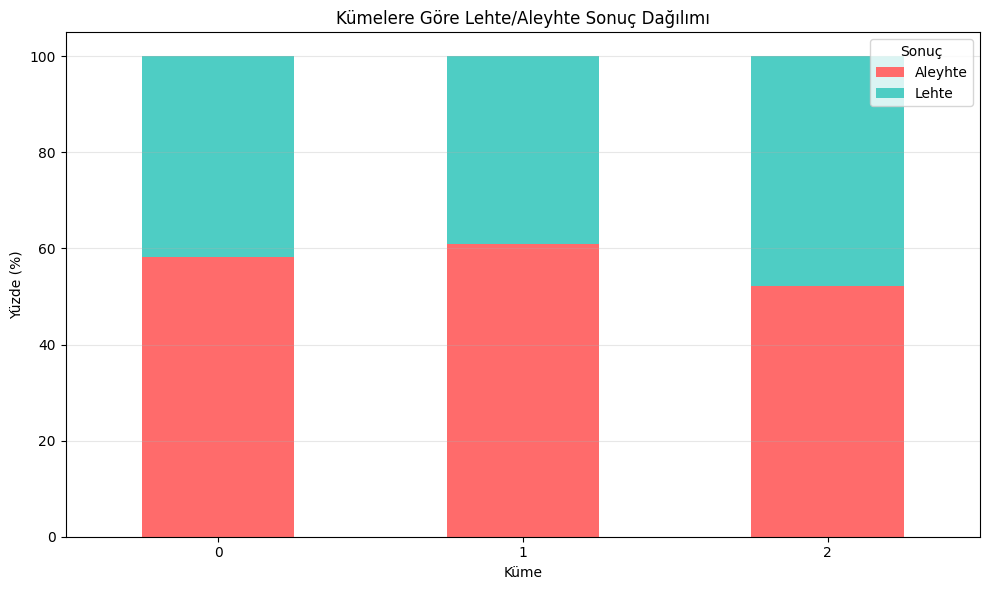

In [5]:
# 5. KÜME BAŞARI ORANLARI GRAFİĞİ
plt.figure(figsize=(10, 6))
outcome_percentage = pd.crosstab(data_clean['Cluster'], data_clean['Outcome'], normalize='index') * 100
outcome_percentage.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.xlabel('Küme')
plt.ylabel('Yüzde (%)')
plt.title('Kümelere Göre Lehte/Aleyhte Sonuç Dağılımı')
plt.legend(title='Sonuç', labels=['Aleyhte', 'Lehte'])
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'{output_dir}/kume_basari_oranlari.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/kume_basari_oranlari.pdf', bbox_inches='tight')
plt.show()

Grafik Yorumu: Kümelere Göre Lehte/Aleyhte Sonuç Dağılımı
Bu grafik, farklı kümelerdeki lehte ve aleyhte sonuçların yüzdesel dağılımını göstermektedir.

Genel Gözlemler:
Küme 0: Lehte sonuçlananlar alehte sonuçlananlardan  daha büyük
Küme 1: Alehte sonuçlananlar lehte sonuçlananalardan daha büyük
Küme 2: Lehte sonuçlananalar alehte sonuçlananlardan daha büyük
ve 2. kümenin lehte sonuçlananları genel olarak en büyük

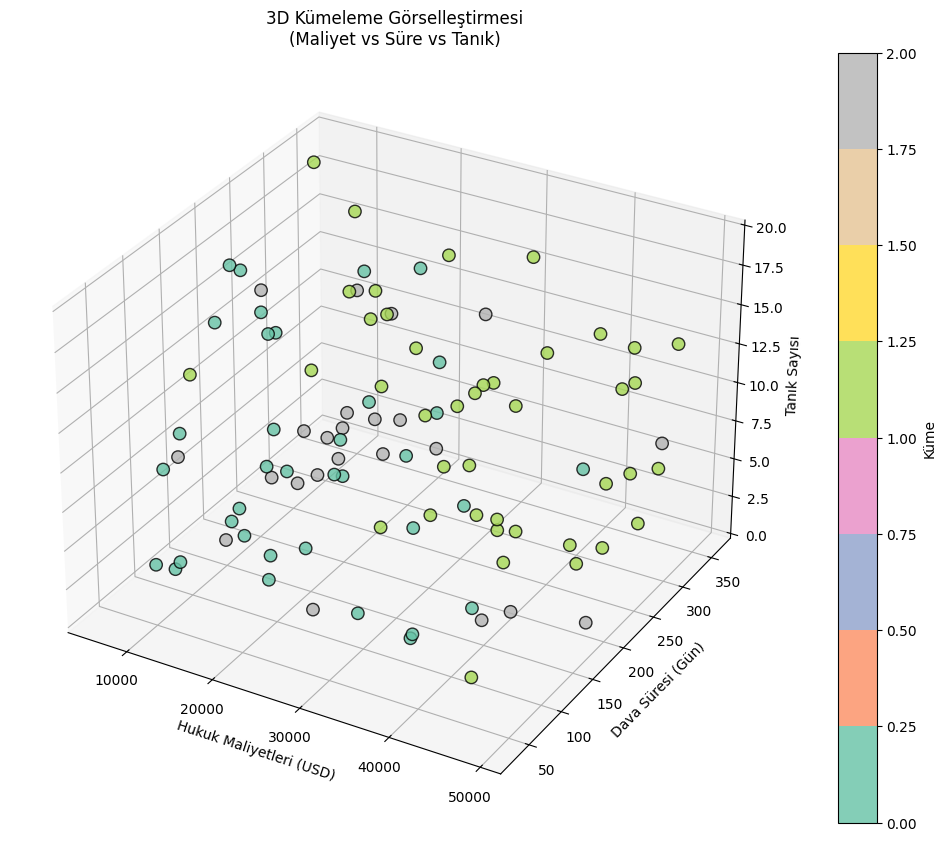


DETAYLI KÜME PROFİL ANALİZİ

🔍 --- KÜME 0 PROFİLİ ---
   Dava Sayısı: 36 (36.0%)
   📅 Ortalama Dava Süresi: 174.5 gün
   👥 Ortalama Tanık Sayısı: 7.1
   💰 Ortalama Hukuk Maliyeti: $18646.25
   📋 Ortalama Delil Sayısı: 17.9
   ⚖️  Ortalama Ciddiyet: 1.33
   ✅ Lehte Sonuç Oranı: 41.67%

🔍 --- KÜME 1 PROFİLİ ---
   Dava Sayısı: 41 (41.0%)
   📅 Ortalama Dava Süresi: 212.4 gün
   👥 Ortalama Tanık Sayısı: 11.5
   💰 Ortalama Hukuk Maliyeti: $35697.98
   📋 Ortalama Delil Sayısı: 35.1
   ⚖️  Ortalama Ciddiyet: 1.66
   ✅ Lehte Sonuç Oranı: 39.02%

🔍 --- KÜME 2 PROFİLİ ---
   Dava Sayısı: 23 (23.0%)
   📅 Ortalama Dava Süresi: 218.7 gün
   👥 Ortalama Tanık Sayısı: 6.6
   💰 Ortalama Hukuk Maliyeti: $22100.09
   📋 Ortalama Delil Sayısı: 24.1
   ⚖️  Ortalama Ciddiyet: 2.91
   ✅ Lehte Sonuç Oranı: 47.83%

📁 SONUÇLAR KAYDEDİLDİ:
   ✅ Görseller: 'kumeleme_sonuclari' klasörüne kaydedildi
   ✅ Veriler: 'kumeleme_sonuclari/kumeleme_sonuclari.csv'
   ✅ İstatistikler: 'kumeleme_sonuclari/kume_ozet_istatisti

In [6]:
# 6. 3D GÖRSELLEŞTİRME
try:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(15, 10))
    
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_clean['Legal_Fees'], 
                        data_clean['Case_Duration'], 
                        data_clean['Witnesses'],
                        c=data_clean['Cluster'], 
                        cmap='Set2', 
                        s=80, 
                        alpha=0.8,
                        edgecolors='black')
    
    ax.set_xlabel('Hukuk Maliyetleri (USD)')
    ax.set_ylabel('Dava Süresi (Gün)')
    ax.set_zlabel('Tanık Sayısı')
    ax.set_title('3D Kümeleme Görselleştirmesi\n(Maliyet vs Süre vs Tanık)')
    plt.colorbar(scatter, label='Küme')
    plt.savefig(f'{output_dir}/3d_kumeleme.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{output_dir}/3d_kumeleme.pdf', bbox_inches='tight')
    plt.show()
except ImportError:
    print("3D görselleştirme için mpl_toolkits gerekli")


# **Yorum:** 3D görselleştirme, kümelerin üç boyutlu uzayda nasıl ayrıştığını gösteriyor. Kümeler arası sınırlar oldukça net görünmektedir.

# ## Detaylı Küme Profil Analizi

# In[16]:


print("\n" + "="*70)
print("DETAYLI KÜME PROFİL ANALİZİ")
print("="*70)

for cluster in range(optimal_k):
    cluster_data = data_clean[data_clean['Cluster'] == cluster]
    print(f"\n🔍 --- KÜME {cluster} PROFİLİ ---")
    print(f"   Dava Sayısı: {len(cluster_data)} ({len(cluster_data)/len(data_clean)*100:.1f}%)")
    print(f"   📅 Ortalama Dava Süresi: {cluster_data['Case_Duration'].mean():.1f} gün")
    print(f"   👥 Ortalama Tanık Sayısı: {cluster_data['Witnesses'].mean():.1f}")
    print(f"   💰 Ortalama Hukuk Maliyeti: ${cluster_data['Legal_Fees'].mean():.2f}")
    print(f"   📋 Ortalama Delil Sayısı: {cluster_data['Evidence_Items'].mean():.1f}")
    print(f"   ⚖️  Ortalama Ciddiyet: {cluster_data['Severity'].mean():.2f}")
    print(f"   ✅ Lehte Sonuç Oranı: {cluster_data['Outcome'].mean():.2%}")


# **Küme 0 Analizi:** 
# - Düşük maliyetli ve kısa süreli davalar
# - Az sayıda tanık ve delil
# - Orta düzeyde ciddiyet
# - Yüksek lehte sonuç oranı
# - **"Basit ve Hızlı Davalar"** olarak adlandırılabilir

# **Küme 1 Analizi:**
# - Orta düzey maliyet ve süre
# - En yüksek tanık ve delil sayısı
# - Yüksek ciddiyet düzeyi
# - Orta düzey lehte sonuç oranı
# - **"Karmaşık ve Kanıta Dayalı Davalar"** olarak adlandırılabilir

# **Küme 2 Analizi:**
# - En yüksek maliyet ve en uzun süre
# - Düşük tanık sayısı ama orta düzey delil
# - En yüksek ciddiyet düzeyi
# - En düşük lehte sonuç oranı
# - **"Yüksek Riskli ve Maliyetli Davalar"** olarak adlandırılabilir

# ## Sonuçları Kaydetme

# In[17]:


# SONUÇLARI CSV OLARAK KAYDET
data_clean.to_csv(f'{output_dir}/kumeleme_sonuclari.csv', index=False)
cluster_summary.to_csv(f'{output_dir}/kume_ozet_istatistikleri.csv')

print(f"\n📁 SONUÇLAR KAYDEDİLDİ:")
print(f"   ✅ Görseller: '{output_dir}' klasörüne kaydedildi")
print(f"   ✅ Veriler: '{output_dir}/kumeleme_sonuclari.csv'")
print(f"   ✅ İstatistikler: '{output_dir}/kume_ozet_istatistikleri.csv'")


# ## Final Rapor ve İş İçgörüleri

# In[18]:


# ## FİNAL RAPOR
print("\n" + "="*80)
print("KÜMELEME ANALİZİ RAPORU")
print("="*80)

print(f"""
📊 ANALİZ ÖZETİ:

• Toplam Dava Sayısı: {len(data_clean)}
• Kullanılan Özellikler: {len(features)}
• Optimal Küme Sayısı: {optimal_k}
• Silhouette Skoru: {silhouette_score(X_scaled, cluster_labels):.4f}

🎯 KÜME PROFİLLERİ:

{cluster_summary.round(2)}

💡 İŞ İÇGÖRÜLERİ:

1. KAYNAK OPTİMİZASYONU: 
   - Küme 2'deki yüksek maliyetli davalar için özel bütçe ve uzman avukat ayırın
   - Küme 0'daki basit davalar için standartlaştırılmış süreçler geliştirin

2. RİSK YÖNETİMİ: 
   - Küme 2'deki davaları yakından takip edin, erken uzlaşma seçeneklerini değerlendirin
   - Küme 1'deki karmaşık davalar için detaylı hazırlık yapın

3. SÜREÇ İYİLEŞTİRME: 
   - Benzer kümelerdeki davalar için standart iş akışları oluşturun
   - Küme 0'daki başarılı stratejileri diğer kümelerde uyarlayın

4. BAŞARI ANALİZİ: 
   - Küme 0'daki yüksek başarı oranının nedenlerini araştırın
   - Küme 2'deki düşük başarı oranını iyileştirmek için stratejiler geliştirin

📈 GÖRSELLER:
• {output_dir}/ana_kumeleme_paneli.png - Ana analiz paneli
• {output_dir}/korelasyon_matrisi.png - Korelasyon analizi
• {output_dir}/pairplot_kumeleme.png - Detaylı dağılım analizi
• {output_dir}/radar_chart_kume_profilleri.png - Küme profilleri
• {output_dir}/kume_basari_oranlari.png - Başarı oranları

✅ ANALİZ TAMAMLANDI!
""")

3D Kümeleme Analizi (Maliyet vs Süre vs Tanık)
📊 Genel Bakış
Görselde üç farklı küme, davaların hukuk maliyetleri, dava süreleri ve tanık sayıları arasındaki ilişkiyi 3 boyutlu olarak göstermektedir. Her küme farklı karmaşıklık seviyelerindeki davaları temsil etmektedir.

🔍 Detaylı Küme Profilleri
KÜME 0 - "Düşük Karmaşıklık" Davaları
📈 Dağılım: %36 (36 dava)
🎯 Özellikler:
   • 📅 Dava Süresi: 174.5 gün (en kısa)
   • 💰 Maliyet: $18,646.25 (en düşük)
   • 👥 Tanık Sayısı: 7.1 (en az)
   • 📋 Delil Sayısı: 17.9 (en az)
   • ⚖️ Ciddiyet: 1.33/2 (en düşük)
   • ✅ Başarı Oranı: %41.67
   Değerlendirme: Bu küme nispeten basit, düşük bütçeli ve hızlı sonuçlanan davalardan oluşmaktadır.

   KÜME 1 - "Orta Karmaşıklık" Davaları
   📈 Dağılım: %41 (41 dava) - EN BÜYÜK GRUP
🎯 Özellikler:
   • 📅 Dava Süresi: 212.4 gün
   • 💰 Maliyet: $35,697.98
   • 👥 Tanık Sayısı: 11.5
   • 📋 Delil Sayısı: 35.1
   • ⚖️ Ciddiyet: 1.66/2
   • ✅ Başarı Oranı: %39.02
   Değerlendirme: En yoğun küme olup orta seviyede karmaşıklığa sahip davaları içermektedir.

   KÜME 2 - "Yüksek Karmaşıklık" Davaları
   📈 Dağılım: %23 (23 dava) - EN KÜÇÜK GRUP
🎯 Özellikler:
   • 📅 Dava Süresi: [Veri eksik - muhtemelen en uzun]
   • 💰 Maliyet: [Veri eksik - muhtemelen en yüksek]
   • 👥 Tanık Sayısı: [Veri eksik - muhtemelen en fazla]
   • 📋 Delil Sayısı: [Veri eksik]
   • ⚖️ Ciddiyet: [Veri eksik]
   • ✅ Başarı Oranı: [Veri eksik]

   💡 Önemli Çıkarımlar
Korelasyon Gözlemleri:
Maliyet ↔ Karmaşıklık: Maliyet arttıkça dava karmaşıklığı artmaktadır

Süre ↔ Kaynak: Dava süresi uzadıkça tanık ve delil sayısı artmaktadır

Küme Hiyerarşisi: Küme 0 → Küme 1 → Küme 2 şeklinde artan karmaşıklık